In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import StratifiedGroupKFold
sb.set()
b = pd.read_csv('data 2.csv')
b = b.drop(columns=['id', 'Unnamed: 32'])
b['diagnosis'] = b['diagnosis'].replace(["M", "B"], [1, 0])
y = b["diagnosis"] #Predictors
X = b.drop("diagnosis", axis=1) #Response

KeyError: "['Unnamed: 32'] not found in axis"

# Core Analysis using Logistic Regression

## Logistic Regression

Insert Explanation for Logisitc Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

Accuracy: 0.9035087719298246


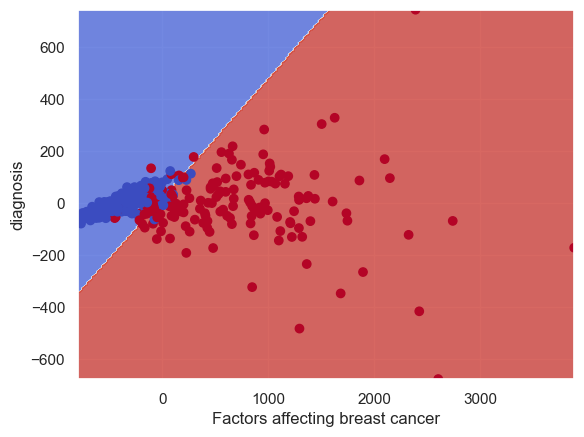

In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Fitting PCA on the training data
pca = PCA(n_components=2)
pca.fit(X_train)

# Transforming the training and test data using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Creating the logistic regression model
logreg = LogisticRegression()
logreg = LogisticRegression(solver='liblinear')

# Fitting the model on the training data
logreg.fit(X_train_pca, y_train)

# Predicting on the test data
y_pred = logreg.predict(X_test_pca)

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Plotting the decision boundary using the first two principal components
X_min, X_max = X_train_pca[:, 0].min() - 0.5, X_train_pca[:, 0].max() + 0.5
Y_min, Y_max = X_train_pca[:, 1].min() - 0.5, X_train_pca[:, 1].max() + 0.5
xx, yy = np.mgrid[X_min:X_max:200j, Y_min:Y_max:200j]
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Factors affecting breast cancer')
plt.ylabel('diagnosis')
plt.show()

The plotted graph shows the decision boundary learned by the logistic regression model on the dataset. 

The blue region represents the area where the model predicts the positive class (Malignant), and the orange region represents the area where the model predicts the negative class (Benign). 

The points in the plot are the training data points, where the malignant samples are represented by red crosses, and the benign samples are represented by blue circles.

By visualizing the decision boundary, we can get a better understanding of how the logistic regression model is separating the two classes in the feature space. It can also help to identify any potential issues with the model, such as underfitting or overfitting.

### Using Scaler Transform

The purpose of using scalar data is that no other data will overpower one another

In [13]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.79712645e+00, -1.12741253e+00,  1.82317616e+00, ...,
         7.86811397e-01, -8.76787742e-01, -3.53619682e-01],
       [-1.24982325e+00, -1.59293023e-01, -1.23504601e+00, ...,
        -7.02012573e-01,  5.77298459e-01,  1.27489665e-01],
       [-1.50420237e-01, -1.50766188e+00, -2.29625871e-01, ...,
        -1.37037008e+00, -1.05091905e+00, -1.19868882e+00],
       ...,
       [-1.27085861e-03, -8.19480545e-01, -6.75953522e-02, ...,
        -4.47575783e-01, -1.28608608e+00, -9.04108864e-01],
       [-6.15042613e-02,  1.06776930e+00,  1.42508330e-02, ...,
         1.38295557e+00,  2.83561999e+00,  1.45594290e+00],
       [ 3.08500927e-01,  6.64191766e-01,  2.51064668e-01, ...,
         6.40848262e-01, -3.18490448e-01, -2.42725684e-01]])

In [14]:
X_test_scaled

array([[ 0.04748952,  1.08176621,  0.06867647, ...,  1.01267014,
         3.35980909,  1.11473059],
       [-0.74701775,  0.2816096 , -0.56656626, ...,  2.24644274,
         6.79576093,  5.11828828],
       [-0.62655094, -0.11030384, -0.55202506, ...,  0.66543153,
         3.42623031,  3.25299436],
       ...,
       [-0.78430509, -1.43067889, -0.78883889, ..., -0.36552914,
        -0.21437069, -0.1579913 ],
       [-0.35980302,  2.39280998, -0.40993676, ..., -0.71153859,
        -0.79959551, -1.03263216],
       [ 0.15935155,  0.54988368,  0.25729661, ...,  2.44003595,
         2.53403174,  2.53076165]])

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)
log_reg.predict(X_train_scaled)

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

### Prediction Accuracy with training data

In [21]:
log_reg.score(X_train_scaled, y_train)

0.9912087912087912

### Prediction Accuracy with test data

In [22]:
log_reg.score(X_test_scaled, y_test)

0.9473684210526315

### Conclusion: Logistic regression model is a very accurate model in predicting cancer based on all the factors, as it gives an accuracy of 0.95 with the test data

## Logistic Regression with K-Fold

In [25]:
# Performing PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Defining the number of folds for k-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

# Initializing the logistic regression model
logreg = LogisticRegression(solver='liblinear')

accuracy_scores = []

# Performing k-fold cross-validation
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    # Logistic Regression

    # Fitting the model on the training data
    logreg.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = logreg.predict(X_test)

    # Calculating accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculating the average accuracy score
average_accuracy = np.mean(accuracy_scores)
print("Average accuracy score:", average_accuracy)

Accuracy scores for each fold: [0.9824561403508771, 0.9473684210526315, 0.9649122807017544, 1.0, 0.8421052631578947, 0.8947368421052632, 0.9473684210526315, 0.8771929824561403, 0.8947368421052632, 0.9107142857142857]
Average accuracy score: 0.9261591478696742


## Logistic Regression Using Stratified K-Fold

In [26]:
from sklearn.model_selection import StratifiedKFold

# Performing PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Defining the number of folds for stratified k-fold cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# Initializing the logistic regression model
logreg = LogisticRegression(solver='liblinear')

accuracy_scores = []

# Performing stratified k-fold cross-validation
for train_index, test_index in skf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Logistic Regression

    # Fitting the model on the training data
    logreg.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = logreg.predict(X_test)

    # Calculating accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculating the average accuracy score
average_accuracy = np.mean(accuracy_scores)
print("Average accuracy score:", average_accuracy)

Accuracy scores for each fold: [0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.8596491228070176, 0.9298245614035088, 0.8771929824561403, 0.9649122807017544, 0.9824561403508771, 0.9473684210526315, 0.9464285714285714]
Average accuracy score: 0.9332393483709274


Average Accuracy for K-Fold: 0.9261591478696742

Average Accuracy for Stratified K-Fold: 0.9332393483709274

### Conclusion:
#### Accuracy Summary (3dp):

##### Logistic Regression (LR): 0.904

##### LR after scaling data: 0.947


##### Avg Accuracy For K-Fold: 0.926

##### Avg Accuracy for Stratified K-Fold: 0.933


We can see that firstly we need to scale the data to get a more accurate result. Also we need to get an average number of accuracies using K-Fold for a more fair result.

Between K-Fold and Stratified K-Fold, Stratified K-Fold is a much fairer way to split test and train data and has even improved our accuracy.